In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = r"/content/Birthrate.csv"


In [3]:
df = pd.read_csv(file_path, skiprows=4)  # Skip metadata rows
df = df[['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
         '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
         '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
         '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
         '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

In [4]:
df = df[df['Country Name'] == 'India'].T
df.columns = ['Birth Rate']
df = df.iloc[1:].astype(float)  # Convert to float type
df.index = pd.to_datetime(df.index)  # Convert year index to DateTime format

#  Handle missing values by forward filling
df.fillna(method='ffill', inplace=True)


<ipython-input-4-a122dbce66e6>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
window_size = 5  # Define window size for moving average
df['Moving Average'] = df['Birth Rate'].rolling(window=window_size).mean()

# Apply Exponential Moving Average (EMA) for smoother results
df['Exponential Moving Average'] = df['Birth Rate'].ewm(span=5, adjust=False).mean()

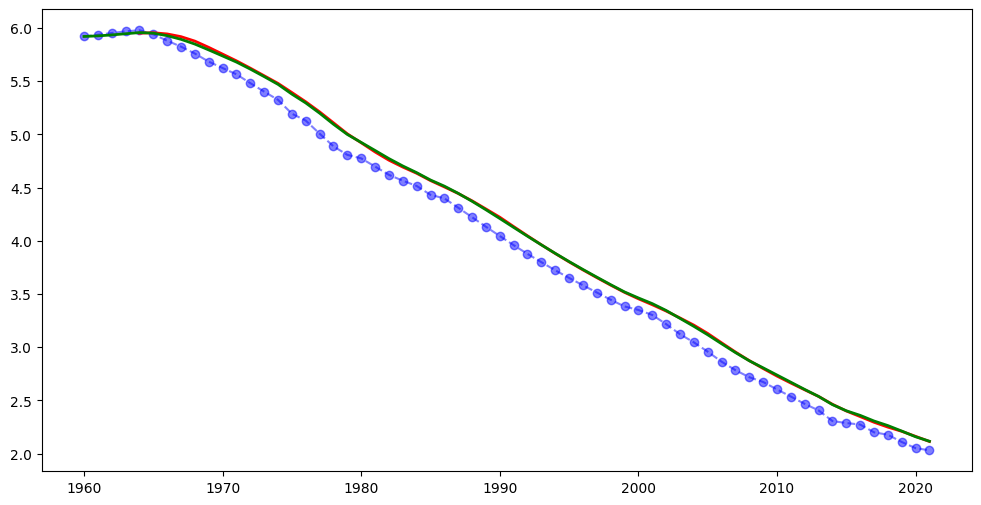

In [6]:
# Plot Original vs. Smoothed Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Birth Rate'], label='Original Data', color='blue', alpha=0.5, linestyle='--', marker='o')
plt.plot(df.index, df['Moving Average'], label=f'{window_size}-Point Moving Average', color='red', linewidth=2)
plt.plot(df.index, df['Exponential Moving Average'], label='Exponential Moving Average (EMA)', color='green', linewidth=2)


<ipython-input-9-b35242489f54>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


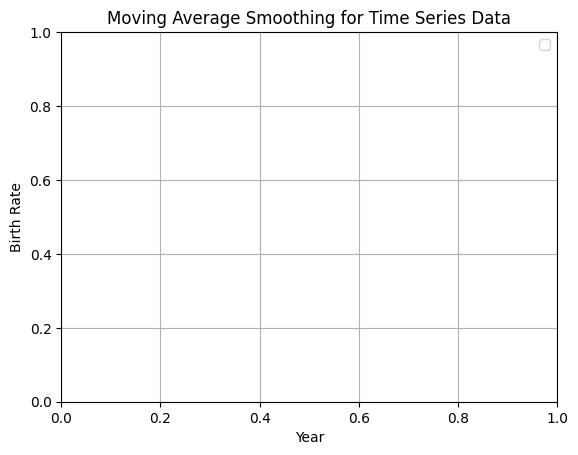

In [9]:
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.title('Moving Average Smoothing for Time Series Data')
plt.legend()
plt.grid()
plt.show()

In [10]:
future_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
future_forecast = df['Moving Average'].iloc[-1]  # Use last moving average value

# Creating a future forecast DataFrame
future_df = pd.DataFrame({'Year': future_years, 'Forecasted Birth Rate': [future_forecast] * len(future_years)})
print(future_df)


        Year  Forecasted Birth Rate
0 2022-12-31                 2.1136
1 2023-12-31                 2.1136
2 2024-12-31                 2.1136
3 2025-12-31                 2.1136
4 2026-12-31                 2.1136


<ipython-input-10-d46a74718a1a>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
